In [1]:
%load_ext autoreload
%autoreload 2

# import warnings
# warnings.filterwarnings('ignore')

import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

import numpy as np
import pandas as pd

In [2]:
def get_stock_returns(ticker):
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    data = pd.read_csv(f"../data/raw/Stocks/{ticker}.us.txt",
                       header=0, index_col=0, parse_dates=True)
    rets = data["Close"].pct_change().dropna()
    return rets

In [3]:
def get_stock_price(ticker):
    """
    Load the stock Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    price = pd.read_csv(f"../data/raw/Stocks/{ticker}.us.txt",
                       header=0, index_col=0, parse_dates=True)["Close"]
    return price

In [4]:
def list_symboles_in_directory():
    """
    List filenames available in the specified directory.
    
    Args:
    - directory (str): Path to the directory
    
    Returns:
    - files (list): List of filenames in the directory
    """
    directory = r'C:\Users\luhar\Downloads\archive\Stocks'
    files = []
    symbols = []

    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            files.append(filename)

    for i in files:
        i = i.split('.')[0]
        symbols.append(i)

    return symbols

In [5]:
tickers = list_symboles_in_directory()
tickers

['a',
 'aa',
 'aaap',
 'aaba',
 'aac',
 'aal',
 'aamc',
 'aame',
 'aan',
 'aaoi',
 'aaon',
 'aap',
 'aapl',
 'aat',
 'aau',
 'aav',
 'aaww',
 'aaxn',
 'ab',
 'abac',
 'abax',
 'abb',
 'abbv',
 'abc',
 'abcb',
 'abcd',
 'abco',
 'abdc',
 'abe',
 'abeo',
 'abeow',
 'abev',
 'abg',
 'abil',
 'abio',
 'ablx',
 'abm',
 'abmd',
 'abr',
 'abrn',
 'abr_a',
 'abr_b',
 'abr_c',
 'abt',
 'abtx',
 'abus',
 'abx',
 'aby',
 'ac',
 'acad',
 'acbi',
 'acc',
 'acco',
 'accp',
 'acer',
 'acerw',
 'acet',
 'acfc',
 'acgl',
 'acglo',
 'acglp',
 'ach',
 'achc',
 'achn',
 'achv',
 'acia',
 'aciu',
 'aciw',
 'acls',
 'acm',
 'acmr',
 'acn',
 'acnb',
 'acor',
 'acp',
 'acre',
 'acrs',
 'acrx',
 'acsf',
 'acsi',
 'acst',
 'acta',
 'actg',
 'acu',
 'acv',
 'acxm',
 'acy',
 'adap',
 'adbe',
 'adc',
 'ades',
 'adhd',
 'adi',
 'adm',
 'adma',
 'admp',
 'adms',
 'adnt',
 'adom',
 'adp',
 'adro',
 'ads',
 'adsk',
 'adsw',
 'adtn',
 'adus',
 'advm',
 'adx',
 'adxs',
 'adxsw',
 'ae',
 'aeb',
 'aed',
 'aee',
 'aeg',
 '

In [6]:
def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")    

In [7]:
! pip install scipy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 325.1 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 372.4 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 321.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB 330.3 kB/s eta 0:02:20
   ---------------------------------------- 0.0/46.2 MB 281.8 kB/s eta 0:02:44
   ---------------------------------------- 0.1/46.2 MB 328.2 kB/s eta 0:02:21
   ---------------------------------------- 0.1/46.2 MB 281.8 kB/s eta 0:02:44
   ---------------------------------------- 0.1/46.2 MB 309.1 kB/s eta 0:02:30
   

In [8]:
from scipy.stats import norm


def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3


def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
        
    return -(r.mean() + z*r.std(ddof=0))

In [11]:
rets = get_stock_returns('aapl')

var_table = [var_gaussian(rets), 
             var_gaussian(rets, modified=True), 
             var_historic(rets)]
print(var_table)
# comparison = pd.concat(var_table, axis=1)
# comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
# comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

[0.04553632364626816, 0.0366072497874313, 0.04036462762439286]


In [12]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [14]:
sharpe_ratio(rets, 0.07, 252)

0.26754145776629146

In [15]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

In [16]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,er)
    }
    weights = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x

In [19]:
def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

def gmv(cov):
    """
    Returns the weights of the Global Minimum Volatility portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)

In [20]:
def optimal_weights(n_points, er, cov):
    """
    Returns a list of weights that represent a grid of n_points on the efficient frontier
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights


def plot_ef(n_points, er, cov, style='.-', legend=False, show_cml=False, riskfree_rate=0, show_ew=False, show_gmv=False):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    ax = ef.plot.line(x="Volatility", y="Returns", style=style, legend=legend)
    if show_cml:
        ax.set_xlim(left = 0)
        # get MSR
        w_msr = msr(riskfree_rate, er, cov)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        # add CML
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
    if show_ew:
        n = er.shape[0]
        w_ew = np.repeat(1/n, n)
        r_ew = portfolio_return(w_ew, er)
        vol_ew = portfolio_vol(w_ew, cov)
        # add EW
        ax.plot([vol_ew], [r_ew], color='goldenrod', marker='o', markersize=10)
    if show_gmv:
        w_gmv = gmv(cov)
        r_gmv = portfolio_return(w_gmv, er)
        vol_gmv = portfolio_vol(w_gmv, cov)
        # add EW
        ax.plot([vol_gmv], [r_gmv], color='midnightblue', marker='o', markersize=10)
        
        return ax

In [34]:
import pandas as pd

# Define function to read data for a single stock
def read_stock_data(stock_symbol, start_date, end_date):
    file_path = f"../data/raw/Stocks/{stock_symbol}.us.txt"
    df = pd.read_csv(file_path, parse_dates=True, index_col=0, header=0)
    df = df[(df.index >= start_date) & (df.index <= end_date)]
    df = df[['Close']].rename(columns={'Close': stock_symbol})
    return df

# Define function to create DataFrame with closing prices for multiple stocks
def create_portfolio_dataframe(stock_symbols, start_date, end_date):
    # Initialize an empty DataFrame
    portfolio_df = pd.DataFrame(index=pd.date_range(start_date, end_date))

    # Loop through each stock symbol
    for stock_symbol in stock_symbols:
        try:
            # Read data for the current stock
            stock_df = read_stock_data(stock_symbol, start_date, end_date)
            
            # Merge the current stock data with the portfolio DataFrame
            portfolio_df = pd.merge(portfolio_df, stock_df, how='left', left_index=True, right_index=True)
        except FileNotFoundError:
            print(f"Data not found for stock: {stock_symbol}")

    return portfolio_df

# Example usage:
if __name__ == "__main__":
    # User inputs
    stock_symbols = ['aapl', 'ibm', 'amzn', 'kodk-ws', 'ba']  # List of stock symbols
    start_date = '2015-01-01'  # Start date of the date range
    end_date = '2015-12-31'  # End date of the date range

    # Create portfolio DataFrame
    portfolio_df = create_portfolio_dataframe(stock_symbols, start_date, end_date)

    # Display the resulting DataFrame
    portfolio_df
portfolio_df.dropna()

,aapl,ibm,amzn,kodk-ws,ba
2015-03-04,122.16,144.16,382.72,4.64,142.54
2015-03-05,120.14,145.75,387.83,4.85,142.64
2015-03-09,120.82,145.39,378.56,5.00,142.89
2015-03-10,118.32,142.71,369.51,4.64,140.76
2015-03-11,116.16,141.79,366.37,4.64,139.60
...,...,...,...,...,...
2015-12-18,102.09,125.10,664.14,2.43,131.34
2015-12-24,104.01,128.20,662.79,2.97,135.06
2015-12-28,102.83,127.61,675.20,2.04,136.02
2015-12-29,104.68,129.63,693.97,2.22,138.67


In [35]:
er = annualize_rets(portfolio_df.pct_change().dropna(), 252)
cov = portfolio_df.pct_change().dropna().cov()

C:\Users\luhar\AppData\Local\Temp\ipykernel_12192\2874542863.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  er = annualize_rets(portfolio_df.pct_change().dropna(), 252)
C:\Users\luhar\AppData\Local\Temp\ipykernel_12192\2874542863.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cov = portfolio_df.pct_change().dropna().cov()


In [36]:
er

aapl      -0.144298
ibm       -0.096691
amzn       0.607318
kodk-ws   -0.349789
ba        -0.038021
dtype: float64

In [37]:
cov

,aapl,ibm,amzn,kodk-ws,ba
aapl,0.000187,0.000084,0.000100,0.000033,0.000081
ibm,0.000084,0.000125,0.000077,0.000007,0.000068
amzn,0.000100,0.000077,0.000284,-0.000132,0.000077
kodk-ws,0.000033,0.000007,-0.000132,0.005827,0.000052
ba,0.000081,0.000068,0.000077,0.000052,0.000120


<Axes: xlabel='Volatility'>

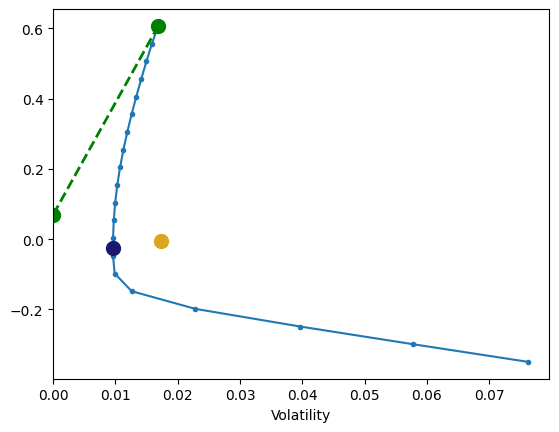

In [56]:
plot_ef(20, er, cov, style='.-', legend=False, show_cml=True, riskfree_rate=0.07, show_ew=True, show_gmv=True)


In [44]:
w_msr = msr(0.03, er, cov)
w_msr

array([0., 0., 1., 0., 0.])